<a href="https://colab.research.google.com/github/falilo/CMP414ArtificialIntelligence/blob/main/Week5_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "https://www.statlearning.com/s/Advertising.csv"
advertising = pd.read_csv(url, index_col=0)
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


1. Apply the normal equation to calculate parameter values for the best fit.

In [3]:
# Let extract the data of radio and sales from advertising data
data = advertising.loc[:, ['radio', 'sales']]
data.head()

,radio,sales
1,37.8,22.1
2,39.3,10.4
3,45.9,9.3
4,41.3,18.5
5,10.8,12.9


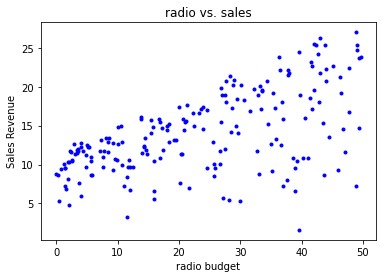

In [4]:
# Let visualize the aspect training data points on plot
# plot radio vs. sales
plt.plot(advertising['radio'], advertising['sales'], 'b.')
plt.title("radio vs. sales")
plt.xlabel("radio budget")
plt.ylabel("Sales Revenue")
plt.savefig("radiovsSales.png")
plt.show() 

In [5]:
# The relation between X and Y in linear regression is: Y≈f(X)=β0+β1X. where β0 and β1 are parameters
# Let train a linear regression model using sklearn between radio and sales
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(data[['radio']], data[['sales']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# Let calculate those parameters' values
print(model_lr.coef_)
print(model_lr.intercept_)

[[0.20249578]]
[9.3116381]


2. Display the regression line with the training data points.

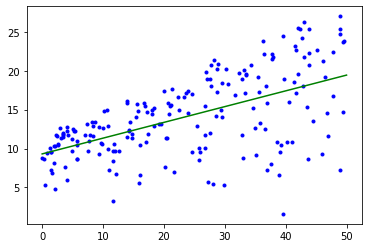

In [7]:
# Regression line and training data point 
m = model_lr.coef_[0, 0]   # slope
b = model_lr.intercept_[0] # y-intercept

plt.plot(data['radio'], data['sales'], 'b.')
x_coordinates = np.array([0,50])
y_coordinates = x_coordinates * m + b
plt.plot(x_coordinates, y_coordinates, 'g-')

3. Use `sklearn` to build the same model. Verify that the parameters values are the same as those from the normal equation.

In [8]:
# Let calculate the squared error of those parameters
beta0 = 9.31
beta1 = 0.20
#i = 1
x1 = data.loc[1, 'radio'] # 37.8
y1 = data.loc[1, 'sales'] #22.1
print("x1, y1:", x1, y1)

# Calculate f(x1) = beta0 + beta1 * x1
prediction1 = beta0 + beta1 * x1
print("Prediction on Record 1:", prediction1)

# Calculate the squared error (y1 - f(x1)) ** 2
error1 = (y1 - prediction1) ** 2
print("Squared error on Record 1:", error1)

x1, y1: 37.8 22.1
Prediction on Record 1: 16.87
Squared error on Record 1: 27.352900000000005


In [9]:
# Let create a function that calculate the squared error of all index
def get_squared_error (beta0, beta1, data, i):

  x = data.loc[i, 'radio']
  y = data.loc[i, 'sales']
  prediction = beta0 + beta1 * x
  squared_error = (y - prediction)**2

  return squared_error

In [10]:
# Let calculate the list of all errors
list_errors = [get_squared_error(beta0, beta1, data, i) for i in data.index]
print(list_errors)

[27.352900000000005, 45.832900000000016, 84.45610000000002, 0.8648999999999994, 2.0448999999999993, 141.3721000000001, 16.5649, 0.0009000000000000682, 24.304900000000007, 0.5928999999999993, 3.4969000000000037, 10.824099999999982, 50.836900000000036, 1.2769000000000017, 9.672099999999997, 12.60249999999998, 17.05690000000002, 51.408899999999974, 4.452099999999998, 0.2600999999999998, 9.92249999999999, 4.7089, 47.472100000000005, 7.896099999999993, 4.536900000000004, 3.960100000000001, 0.02890000000000058, 10.5625, 17.388899999999985, 4.040100000000006, 41.344899999999974, 0.792100000000001, 0.00010000000000003127, 16.728099999999984, 0.008099999999999975, 7.1289, 53.728899999999975, 20.160100000000018, 20.702500000000008, 21.622499999999988, 8.008900000000011, 1.2321000000000026, 34.222499999999975, 3.6481000000000003, 35.40250000000001, 1.1880999999999997, 0.47610000000000174, 31.248099999999997, 5.4289000000000005, 3.802500000000004, 2.160900000000002, 0.2809000000000012, 24.50249999

In [11]:
# Calculate the MSE
MSE = np.mean(list_errors)
print("MSE:", MSE)

MSE: 18.097328


In [12]:
# Construct X and Y as numpy arrays
X = np.hstack([np.ones([len(data), 1]), data[['radio']].values])
# print(X)
y = data[['sales']].values
# print(y)

beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(beta)

[[9.3116381 ]
 [0.20249578]]


In [13]:
# In conclusion we can see the the parameters are the same
beta0 = 9.31
beta1 = 0.20